In [ ]:
!pip install geopandas osmnx shapely pyproj


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 3.5 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt


In [ ]:
# Get Lahti city boundary
lahti = ox.geocode_to_gdf("Lahti, Finland")

# Check the result
lahti


,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((25.54031 60.99826, 25.54084 60.99712...",25.540307,60.886653,26.168972,61.102665,160503994,relation,345901,60.982628,25.661342,boundary,administrative,16,0.658186,city,Lahti,"Lahti, Lahti sub-region, Päijät-Häme, Mainland..."


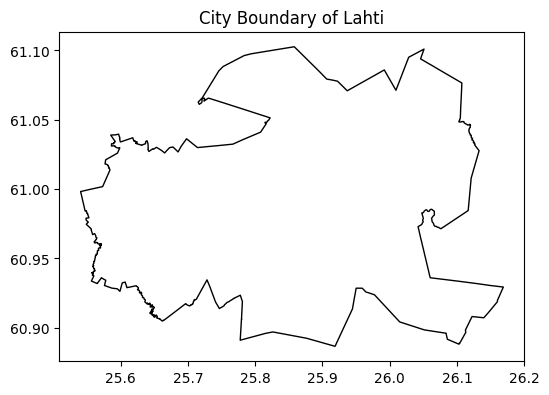

In [ ]:
lahti.plot(edgecolor="black", facecolor="none", figsize=(6,6))
plt.title("City Boundary of Lahti")
plt.show()


In [ ]:
lahti.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
lahti.to_file("lahti_boundary.geojson", driver="GeoJSON")


In [ ]:
!pip install rasterio rioxarray xarray


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.1 MB/s eta 0:00:00


In [ ]:
import rasterio
import rioxarray as rxr
import xarray as xr
import numpy as np


In [ ]:
import urllib.request

url = "https://land.copernicus.eu/pan-european/corine-land-cover/clc2018?download"
output_path = "CLC2018.tif"

urllib.request.urlretrieve(url, output_path)


('CLC2018.tif', <http.client.HTTPMessage at 0x7a1c641d8d40>)

In [ ]:
!rm -f CLC2018.tif


In [ ]:
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt


In [ ]:
# Define forest-related tags
tags = {
    "landuse": "forest",
    "natural": "wood"
}

# Download forest features within Lahti
forests = ox.features_from_place("Lahti, Finland", tags)

forests.head()



geometry natural          source  \
element id                                                              
node    5264954790  POINT (25.78944 61.03519)    wood  Bing satellite   
        7431070974  POINT (25.78961 60.99643)    wood             NaN   
        9450235959  POINT (26.07639 61.04975)    wood             NaN   
        9473351882  POINT (26.02555 61.07475)    wood             NaN   
        9517319983   POINT (25.94324 60.9778)    wood             NaN   

                       leaf_type                  name landuse leisure  \
element id                                                               
node    5264954790           NaN                   NaN     NaN     NaN   
        7431070974  needleleaved  Lehmuksentien männyt     NaN     NaN   
        9450235959           NaN                   NaN     NaN     NaN   
        9473351882           NaN              Suninsuo     NaN     NaN   
        9517319983           NaN                   NaN     NaN     NaN   

                   name:fi place wikidata leaf_cycle wikipedia fixme clc:code  \
element id                                                                      
node    5264954790     NaN   NaN      NaN        NaN       NaN   NaN      NaN   
        7431070974     NaN   NaN      NaN        NaN       NaN   NaN      NaN   
        9450235959     NaN   NaN      NaN        NaN       NaN   NaN      NaN   
        9473351882     NaN   NaN      NaN        NaN       NaN   NaN      NaN   
        9517319983     NaN   NaN      NaN        NaN       NaN   NaN      NaN   

                   note FIXME start_date last_partial_chop type  
element id                                                       
node    5264954790  NaN   NaN        NaN               NaN  NaN  
        7431070974  NaN   NaN        NaN               NaN  NaN  
        9450235959  NaN   NaN        NaN               NaN  NaN  
        9473351882  NaN   NaN        NaN               NaN  NaN  
        9517319983  NaN   NaN        NaN               NaN  NaN

In [ ]:
# Keep only polygon geometries
forests = forests[forests.geometry.type.isin(["Polygon", "MultiPolygon"])]

forests = forests.reset_index(drop=True)
forests


,geometry,natural,source,leaf_type,name,landuse,leisure,name:fi,place,wikidata,leaf_cycle,wikipedia,fixme,clc:code,note,FIXME,start_date,last_partial_chop,type
0,"POLYGON ((25.57561 60.98668, 25.57566 60.98671...",NaN,NaN,NaN,NaN,forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon
1,"POLYGON ((25.6715 60.93962, 25.67101 60.93775,...",wood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon
2,"POLYGON ((25.55877 60.97346, 25.55881 60.97357...",NaN,NaN,NaN,NaN,forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon
3,"POLYGON ((25.58894 60.96928, 25.5885 60.96967,...",wood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon
4,"POLYGON ((25.5826 61.00824, 25.58245 61.00811,...",NaN,NaN,NaN,NaN,forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,"POLYGON ((25.67539 60.92525, 25.67549 60.92518...",NaN,NaN,NaN,NaN,forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2810,"POLYGON ((25.66894 60.92579, 25.6684 60.92585,...",NaN,NaN,NaN,NaN,forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2811,"POLYGON ((25.67096 60.95307, 25.67108 60.95305...",NaN,NaN,NaN,NaN,forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2812,"POLYGON ((25.67186 60.9525, 25.67199 60.95251,...",NaN,NaN,NaN,NaN,forest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Make sure CRS matches
forests = forests.to_crs(lahti.crs)

# Clip to Lahti boundary
forests_lahti = gpd.clip(forests, lahti)

forests_lahti


,geometry,natural,source,leaf_type,name,landuse,leisure,name:fi,place,wikidata,leaf_cycle,wikipedia,fixme,clc:code,note,FIXME,start_date,last_partial_chop,type
1116,"POLYGON ((25.91565 60.88733, 25.91608 60.88782...",wood,corine_2006,needleleaved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312,Corine Coniferous forest,NaN,NaN,NaN,NaN
1107,"POLYGON ((25.87633 60.89288, 25.87698 60.89238...",wood,corine_2006,mixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,313,Corine Mixed forest,NaN,NaN,NaN,NaN
1181,"POLYGON ((25.87838 60.92112, 25.87792 60.9212,...",wood,corine_2006,needleleaved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312,Corine Coniferous forest,NaN,NaN,NaN,NaN
1113,"POLYGON ((25.89507 60.92264, 25.89773 60.92245...",wood,corine_2006,mixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,313,Corine Mixed forest,NaN,NaN,NaN,NaN
1180,"POLYGON ((25.86811 60.9228, 25.86644 60.923, 2...",wood,corine_2006,mixed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,313,Corine Mixed forest,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,"POLYGON ((25.91205 61.07879, 25.91169 61.07847...",wood,corine_2006,needleleaved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312,Corine Coniferous forest,NaN,NaN,NaN,multipolygon
1497,"POLYGON ((25.89299 61.08158, 25.89316 61.08194...",wood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,"POLYGON ((25.89429 61.08283, 25.89514 61.08279...",wood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,"POLYGON ((25.89645 61.08414, 25.8964 61.08405,...",wood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


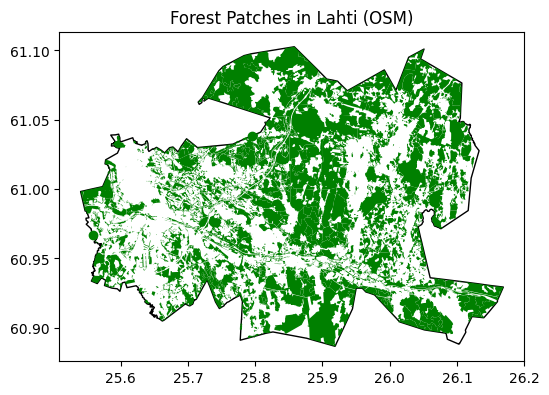

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
lahti.plot(ax=ax, facecolor="none", edgecolor="black")
forests_lahti.plot(ax=ax, color="green")
plt.title("Forest Patches in Lahti (OSM)")
plt.show()


In [ ]:
# Reproject to metric CRS
forests_m = forests_lahti.to_crs(epsg=3067)
lahti_m = lahti.to_crs(epsg=3067)


In [ ]:
# Compute area in square meters
forests_m["area_m2"] = forests_m.geometry.area

# Convert to hectares (optional, easier to interpret)
forests_m["area_ha"] = forests_m["area_m2"] / 10_000

forests_m[["area_m2", "area_ha"]].head()


,area_m2,area_ha
1116,30791.013171,3.079101
1107,1557.827421,0.155783
1181,709502.988457,70.950299
1113,387697.652400,38.769765
1180,147023.843983,14.702384


In [ ]:
total_forest_area_ha = forests_m["area_ha"].sum()
total_forest_area_ha


np.float64(26088.859368832535)

In [ ]:
num_patches = len(forests_m)
num_patches


2814

In [ ]:
mean_patch_size_ha = forests_m["area_ha"].mean()
mean_patch_size_ha


np.float64(9.27109430306771)

In [ ]:
largest_patch_ha = forests_m["area_ha"].max()
largest_patch_ha


1502.1398858407679

In [ ]:
largest_patch_percent = (largest_patch_ha / total_forest_area_ha) * 100
largest_patch_percent


np.float64(5.757782908804832)

In [ ]:
import pandas as pd

metrics = pd.DataFrame({
    "Metric": [
        "Total forest area (ha)",
        "Number of patches",
        "Mean patch size (ha)",
        "Largest patch (ha)",
        "Largest patch (%)"
    ],
    "Value": [
        total_forest_area_ha,
        num_patches,
        mean_patch_size_ha,
        largest_patch_ha,
        largest_patch_percent
    ]
})

metrics


,Metric,Value
0,Total forest area (ha),26088.859369
1,Number of patches,2814.000000
2,Mean patch size (ha),9.271094
3,Largest patch (ha),1502.139886
4,Largest patch (%),5.757783


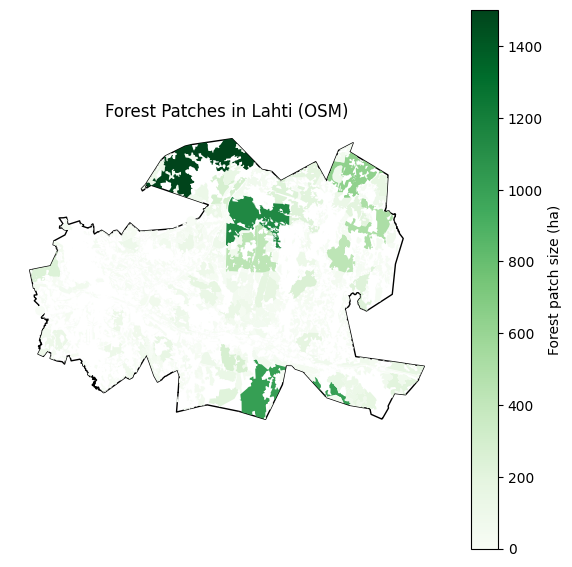

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))

# Plot city boundary
lahti_m.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1)

# Plot forest patches
forests_m.plot(
    ax=ax,
    column="area_ha",
    cmap="Greens",
    legend=True,
    legend_kwds={"label": "Forest patch size (ha)"}
)

plt.title("Forest Patches in Lahti (OSM)")
plt.axis("off")
plt.show()


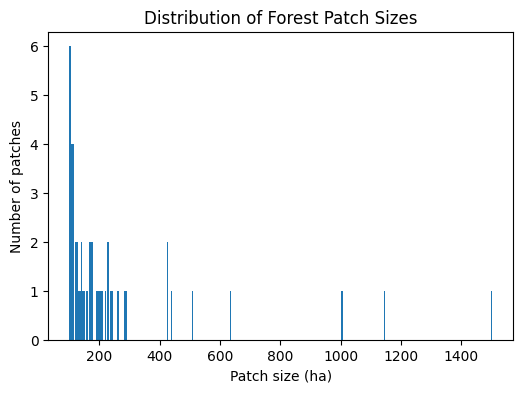

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

non_zero_patches = forests_m["area_ha"][forests_m["area_ha"] >100]
plt.hist(non_zero_patches, bins=300)

plt.xlabel("Patch size (ha)")
plt.ylabel("Number of patches")
plt.title("Distribution of Forest Patch Sizes")
plt.show()



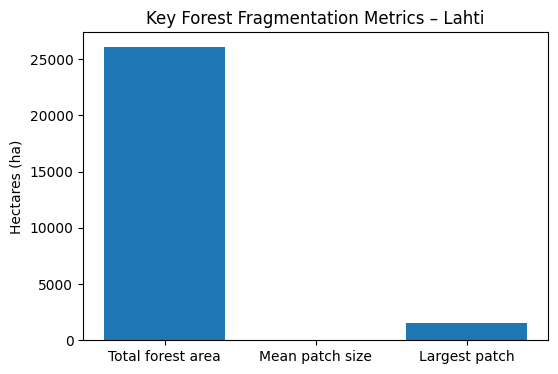

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(
    ["Total forest area", "Mean patch size", "Largest patch"],
    [total_forest_area_ha, mean_patch_size_ha, largest_patch_ha]
)
plt.ylabel("Hectares (ha)")
plt.title("Key Forest Fragmentation Metrics – Lahti")
plt.show()


In [ ]:
# Compute perimeter in meters
forests_m["perimeter_m"] = forests_m.geometry.length

# Optional: Convert to km
forests_m["perimeter_km"] = forests_m["perimeter_m"] / 1000


In [ ]:
total_perimeter_km = forests_m["perimeter_km"].sum()
edge_density = total_perimeter_km / total_forest_area_ha
edge_density


np.float64(0.13482143657336526)

In [ ]:
metrics = pd.DataFrame({
    "Metric": [
        "Total forest area (ha)",
        "Number of patches",
        "Mean patch size (ha)",
        "Largest patch (ha)",
        "Largest patch (%)",
        "Edge density (km/ha)"
    ],
    "Value": [
        total_forest_area_ha,
        num_patches,
        mean_patch_size_ha,
        largest_patch_ha,
        largest_patch_percent,
        edge_density
    ]
})

metrics


,Metric,Value
0,Total forest area (ha),26088.856368
1,Number of patches,2814.000000
2,Mean patch size (ha),9.271093
3,Largest patch (ha),1502.139886
4,Largest patch (%),5.757784
5,Edge density (km/ha),0.134821


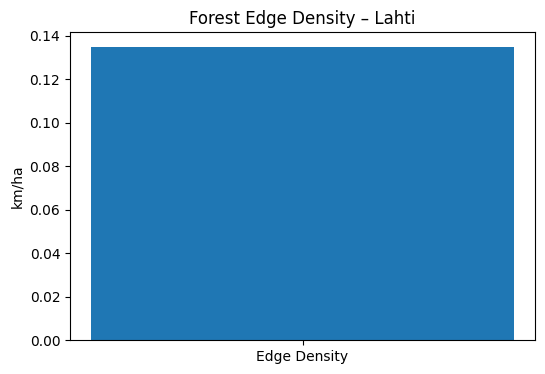

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(["Edge Density"], [edge_density])
plt.ylabel("km/ha")
plt.title("Forest Edge Density – Lahti")
plt.show()


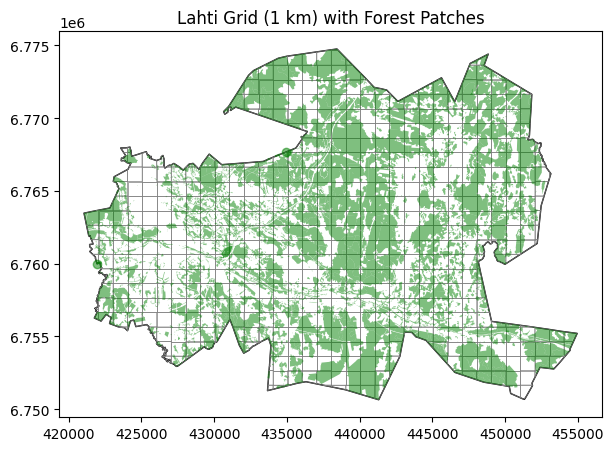

In [ ]:
from shapely.geometry import box
import geopandas as gpd
import numpy as np

# Get city boundary in metric CRS (already done: lahti_m)
minx, miny, maxx, maxy = lahti_m.total_bounds

# Define grid size (meters)
grid_size = 1000  # 1 km

# Create grid cells
x_coords = np.arange(minx, maxx, grid_size)
y_coords = np.arange(miny, maxy, grid_size)

grid_cells = []
for x in x_coords:
    for y in y_coords:
        grid_cells.append(box(x, y, x+grid_size, y+grid_size))

grid = gpd.GeoDataFrame({'geometry': grid_cells}, crs=lahti_m.crs)

# Clip grid to Lahti boundary
grid = gpd.clip(grid, lahti_m)

# Visualize
fig, ax = plt.subplots(figsize=(7,7))
lahti_m.plot(ax=ax, facecolor='none', edgecolor='black')
grid.plot(ax=ax, facecolor='none', edgecolor='grey', linewidth=0.5)
forests_m.plot(ax=ax, color='green', alpha=0.5)
plt.title("Lahti Grid (1 km) with Forest Patches")
plt.show()


In [ ]:
# Initialize metrics list
metrics_list = []

for i, cell in grid.iterrows():
    # Select forest patches within this cell
    forests_in_cell = forests_m[forests_m.geometry.intersects(cell.geometry)]

    if len(forests_in_cell) > 0:
        total_area = forests_in_cell['area_ha'].sum()
        num_patches = len(forests_in_cell)
        mean_patch = forests_in_cell['area_ha'].mean()
        largest_patch = forests_in_cell['area_ha'].max()
        total_perimeter_km = forests_in_cell['perimeter_km'].sum()
        edge_density = total_perimeter_km / total_area
    else:
        total_area = 0
        num_patches = 0
        mean_patch = 0
        largest_patch = 0
        edge_density = 0

    metrics_list.append({
        'grid_id': i,
        'total_area_ha': total_area,
        'num_patches': num_patches,
        'mean_patch_ha': mean_patch,
        'largest_patch_ha': largest_patch,
        'edge_density_km_per_ha': edge_density
    })

# Convert to DataFrame
grid_metrics = pd.DataFrame(metrics_list)

# Merge metrics back to grid for plotting
grid = grid.merge(grid_metrics, left_index=True, right_on='grid_id')


In [ ]:


# Convert list of metrics to DataFrame
grid_metrics = pd.DataFrame(metrics_list)
grid_metrics.head()


,grid_id,total_area_ha,num_patches,mean_patch_ha,largest_patch_ha,edge_density_km_per_ha
0,0,9.433789,1,9.433789,9.433789,0.241544
1,1,0.000000,0,0.000000,0.000000,0.000000
2,2,0.304233,1,0.304233,0.304233,3.103029
3,3,29.088045,4,7.272011,27.961993,0.230615
4,4,63.256491,7,9.036642,28.935661,0.186183


In [ ]:
print(grid_metrics.columns)


Index(['grid_id', 'total_area_ha', 'num_patches', 'mean_patch_ha',
       'largest_patch_ha', 'edge_density_km_per_ha'],
      dtype='object')


In [ ]:
# Add a column to grid for merge
grid['grid_id'] = grid.index

# Merge metrics back into the grid GeoDataFrame
grid = grid.merge(grid_metrics, on='grid_id', how='left')

# Check columns
print(grid.columns)


Index(['grid_id', 'geometry', 'grid_id_x', 'total_area_ha_x', 'num_patches_x',
       'mean_patch_ha_x', 'largest_patch_ha_x', 'edge_density_km_per_ha_x',
       'grid_id_y', 'total_area_ha_y', 'num_patches_y', 'mean_patch_ha_y',
       'largest_patch_ha_y', 'edge_density_km_per_ha_y', 'total_area_ha',
       'num_patches', 'mean_patch_ha', 'largest_patch_ha',
       'edge_density_km_per_ha'],
      dtype='object')


In [ ]:
grid[['total_area_ha', 'num_patches', 'mean_patch_ha', 'largest_patch_ha', 'edge_density_km_per_ha']] = \
    grid[['total_area_ha', 'num_patches', 'mean_patch_ha', 'largest_patch_ha', 'edge_density_km_per_ha']].fillna(0)


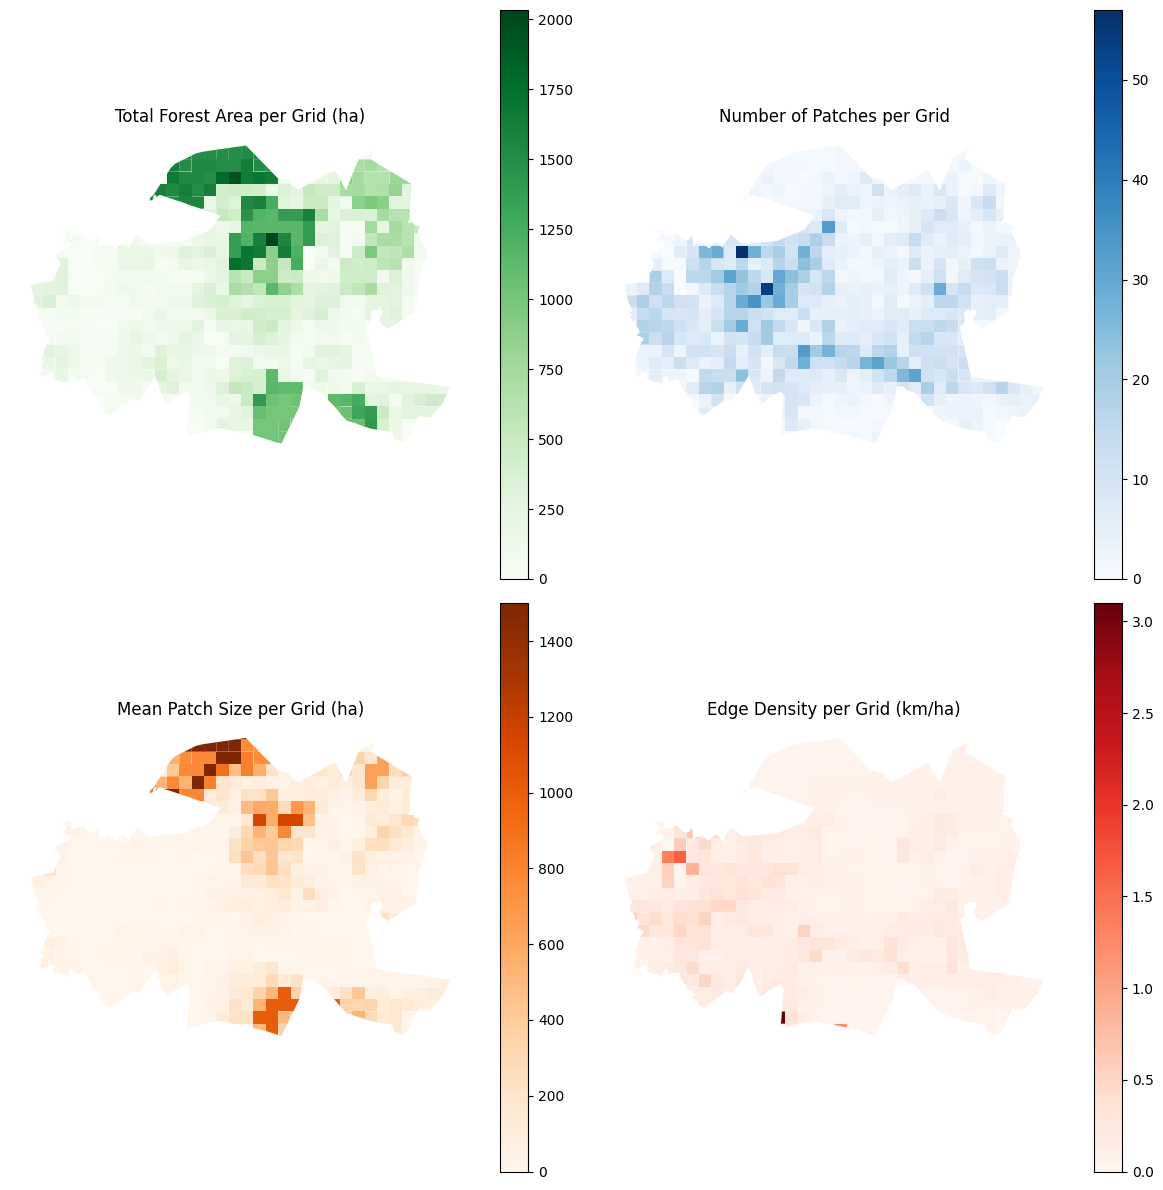

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))

grid.plot(column='total_area_ha', cmap='Greens', legend=True, ax=axs[0,0])
axs[0,0].set_title("Total Forest Area per Grid (ha)")
axs[0,0].axis('off')

grid.plot(column='num_patches', cmap='Blues', legend=True, ax=axs[0,1])
axs[0,1].set_title("Number of Patches per Grid")
axs[0,1].axis('off')

grid.plot(column='mean_patch_ha', cmap='Oranges', legend=True, ax=axs[1,0])
axs[1,0].set_title("Mean Patch Size per Grid (ha)")
axs[1,0].axis('off')

grid.plot(column='edge_density_km_per_ha', cmap='Reds', legend=True, ax=axs[1,1])
axs[1,1].set_title("Edge Density per Grid (km/ha)")
axs[1,1].axis('off')

plt.tight_layout()
plt.show()


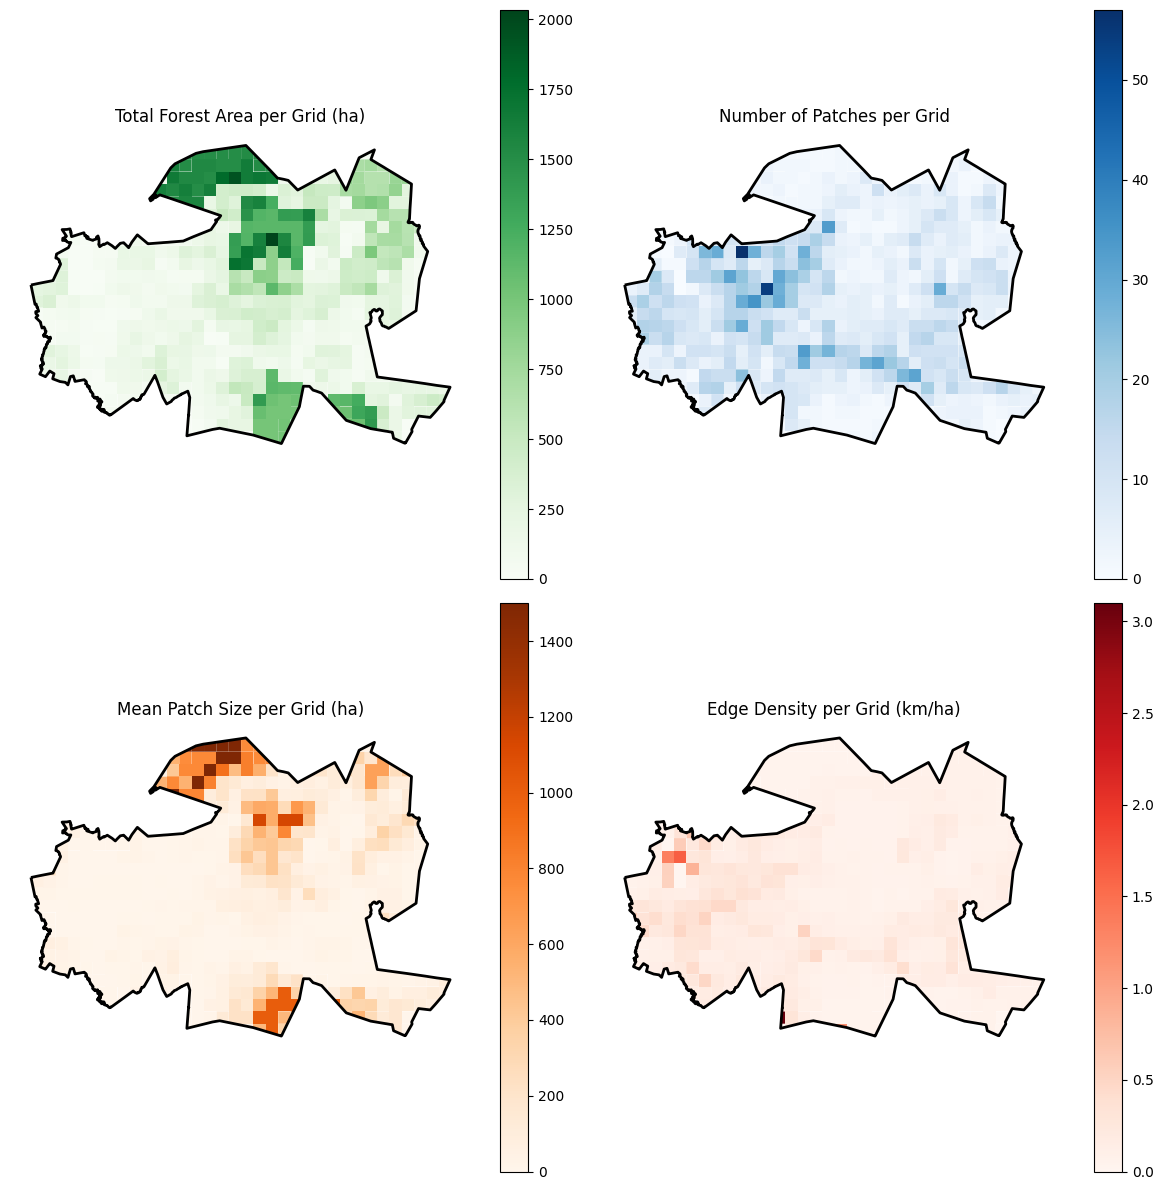

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12,12))

# Plot Total Forest Area
grid.plot(column='total_area_ha', cmap='Greens', legend=True, ax=axs[0,0])
lahti_m.boundary.plot(ax=axs[0,0], edgecolor='black', linewidth=2)
axs[0,0].set_title("Total Forest Area per Grid (ha)")
axs[0,0].axis('off')

# Plot Number of Patches
grid.plot(column='num_patches', cmap='Blues', legend=True, ax=axs[0,1])
lahti_m.boundary.plot(ax=axs[0,1], edgecolor='black', linewidth=2)
axs[0,1].set_title("Number of Patches per Grid")
axs[0,1].axis('off')

# Plot Mean Patch Size
grid.plot(column='mean_patch_ha', cmap='Oranges', legend=True, ax=axs[1,0])
lahti_m.boundary.plot(ax=axs[1,0], edgecolor='black', linewidth=2)
axs[1,0].set_title("Mean Patch Size per Grid (ha)")
axs[1,0].axis('off')

# Plot Edge Density
grid.plot(column='edge_density_km_per_ha', cmap='Reds', legend=True, ax=axs[1,1])
lahti_m.boundary.plot(ax=axs[1,1], edgecolor='black', linewidth=2)
axs[1,1].set_title("Edge Density per Grid (km/ha)")
axs[1,1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from shapely.ops import unary_union

def nearest_neighbor_distance(patches):
    """
    Compute mean nearest neighbor distance (km) between patches.
    Returns np.nan if there are fewer than 2 patches.
    """
    if len(patches) < 2:
        return np.nan

    # Reset index to avoid KeyError
    centroids = patches.geometry.centroid.reset_index(drop=True)
    distances = []

    for i, c in enumerate(centroids):
        # Union of all other centroids
        other = centroids.drop(i).unary_union
        nearest = c.distance(other)  # meters
        distances.append(nearest / 1000)  # convert to km

    return np.mean(distances)



In [ ]:
# Initialize ENN column
grid['ENN_km'] = grid.geometry.apply(
    lambda cell: nearest_neighbor_distance(
        forests_m[forests_m.geometry.intersects(cell)]
    )
)

# Fill NaN for grids with <2 patches
grid['ENN_km'] = grid['ENN_km'].fillna(0)


Streaming output truncated to the last 5000 lines.
/tmp/ipython-input-1243002210.py:17: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  other = centroids.drop(i).unary_union
/tmp/ipython-input-1243002210.py:17: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  other = centroids.drop(i).unary_union
/tmp/ipython-input-1243002210.py:17: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  other = centroids.drop(i).unary_union
/tmp/ipython-input-1243002210.py:17: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  other = centroids.drop(i).unary_union
/tmp/ipython-input-1243002210.py:17: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  other = centroids.drop(i).unary_union
/tmp/ipython-input-1243002210.py:17: DeprecationWarning: Th

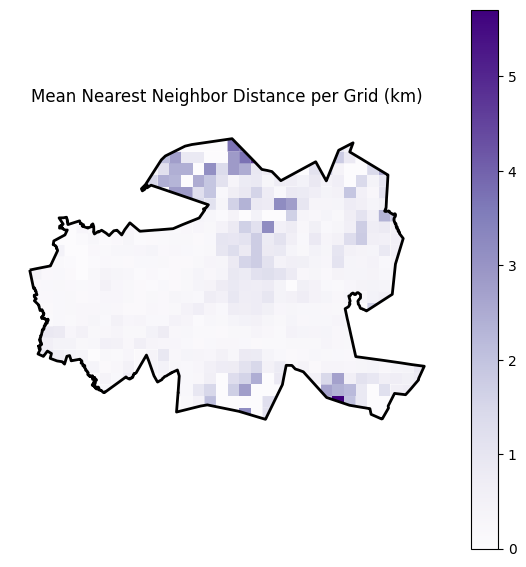

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
grid.plot(column='ENN_km', cmap='Purples', legend=True, ax=ax)
lahti_m.boundary.plot(ax=ax, edgecolor='black', linewidth=2)
plt.title("Mean Nearest Neighbor Distance per Grid (km)")
plt.axis('off')
plt.show()
